<a href="https://colab.research.google.com/github/aligator4sah/kaggle-ai-report/blob/main/Kaggle_AI_Report_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview for write_up dataset

In [106]:
import pandas as pd
import csv

with open("/content/kaggle_writeups_20230510.csv") as file:
  csv_reader = csv.reader(file)

write_ups1 = pd.read_csv('/content/kaggle_writeups_20230510.csv', on_bad_lines='skip', engine='python')
write_ups1.head()

,Competition Launch Date,Title of Competition,Competition URL,Date of Writeup,Title of Writeup,Writeup,Writeup URL
0,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 00:06:46,Released: my Source Code and Analysis,<p>I had a lot of fun with this competition an...,https://www.kaggle.com/c/2447/discussion/185
1,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 04:38:53,6th place(UriB) by Uri Blass,<P>I calculated rating for every player in mon...,https://www.kaggle.com/c/2447/discussion/192
2,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/23/2010 10:38:23,7th place - littlefish,I'm a little surprised I ended up in the top-1...,https://www.kaggle.com/c/2447/discussion/194
3,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/20/2010 11:27:17,3rd place: Chessmetrics - Variant,"<p><span id=""post_text_content_1230""><div dir=...",https://www.kaggle.com/c/2447/discussion/193
4,08/03/2010 00:00:00,Chess ratings - Elo versus the Rest of the World,https://www.kaggle.com/c/2447,11/18/2010 02:44:10,2nd place: TrueSkill Through Time,"Wow, this is a surprise! I looked at this comp...",https://www.kaggle.com/c/2447/discussion/186


In [107]:
write_ups1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Competition Launch Date  3127 non-null   object
 1   Title of Competition     3127 non-null   object
 2   Competition URL          3127 non-null   object
 3   Date of Writeup          3127 non-null   object
 4   Title of Writeup         3127 non-null   object
 5   Writeup                  3125 non-null   object
 6   Writeup URL              3127 non-null   object
dtypes: object(7)
memory usage: 171.1+ KB


In [ ]:
#install packages
!pip install dataprep


In [108]:
write_ups1['Title of Competition'].nunique()

310

In [109]:
write_ups1.loc[164].Writeup

'<p>I got a lot of requests during the competition for a benchmark script. So, as promised, here it is.... After all, its all about learning :D</p>\n\n<p>The script will easily give you 0.80+ in  Public LB. In Private LB, you can easily get a top 10% rank using this script. With some modifications, this script gives top 30 rank out of 2200+ competitors.... not bad ha?! ;)</p>'

In [114]:
# language related competition counts
language_comps = write_ups1[(write_ups1.Writeup.str.contains(
    'language', 'text') | write_ups1['Title of Competition'].str.contains(
    'language')).fillna(False)]['Title of Competition'].unique()
print(f"How many now: {len(language_comps)}")
language_comps[:5]

How many now: 46


array(['Chess ratings - Elo versus the Rest of the World',
       "dunnhumby's Shopper Challenge",
       'StumbleUpon Evergreen Classification Challenge',
       'Microsoft Malware Classification Challenge (BIG 2015)',
       'Flavours of Physics: Finding τ  →  μμμ'], dtype=object)

In [115]:
vision_comps = write_ups1[(write_ups1.Writeup.str.contains(
    'image', 'video') | write_ups1['Title of Competition'].str.contains(
    'image', 'video')).fillna(False)]['Title of Competition'].unique()
print(f"How many now: {len(vision_comps)}")
vision_comps[:5]

How many now: 171


array(['IJCNN Social Network Challenge',
       'Challenges in Representation Learning: The Black Box Learning Challenge',
       'StumbleUpon Evergreen Classification Challenge',
       'Multi-label Bird Species Classification - NIPS 2013',
       'National Data Science Bowl'], dtype=object)

Overview for metadata dataset

In [124]:
from dataprep.clean import clean_headers
df = clean_headers(write_ups1)

Column Headers Cleaning Report:
	7 values cleaned (100.0%)


In [117]:
# filter the result only related to image or video
vision_comps = write_ups1[(write_ups1.Writeup.str.contains(
    'image', 'video') | write_ups1['Title of Competition'].str.contains(
    'image', 'video')).fillna(False)]
vision_comps.head()
print(len(vision_comps))

1149


In [118]:
vision_df = clean_headers(vision_comps)

Column Headers Cleaning Report:
	7 values cleaned (100.0%)


In [119]:
image_dis = vision_df["title_of_competition"].value_counts().to_frame()
print(image_dis.head())

                                                    title_of_competition
Human Protein Atlas - Single Cell Classification                      30
Cassava Leaf Disease Classification                                   28
Shopee - Price Match Guarantee                                        27
APTOS 2019 Blindness Detection                                        27
RANZCR CLiP - Catheter and Line Position Challenge                    24


In [120]:
# Using groupby() and count()
df2 = vision_df.groupby(['title_of_competition'])['title_of_competition'].count().reset_index(name='counts')
sortedDF=df2.sort_values('counts', ascending=False)

# select top 10 to visualize
df2 = sortedDF.iloc[:10]
print(df2)

                                  title_of_competition  counts
70    Human Protein Atlas - Single Cell Classification      30
18                 Cassava Leaf Disease Classification      28
5                       APTOS 2019 Blindness Detection      27
143                     Shopee - Price Match Guarantee      27
120  RANZCR CLiP - Catheter and Line Position Chall...      24
76                       Image Matching Challenge 2022      21
8                    Avito Demand Prediction Challenge      21
134                  SIIM-ISIC Melanoma Classification      21
11      Bengali.AI Handwritten Grapheme Classification      20
148                  TGS Salt Identification Challenge      18


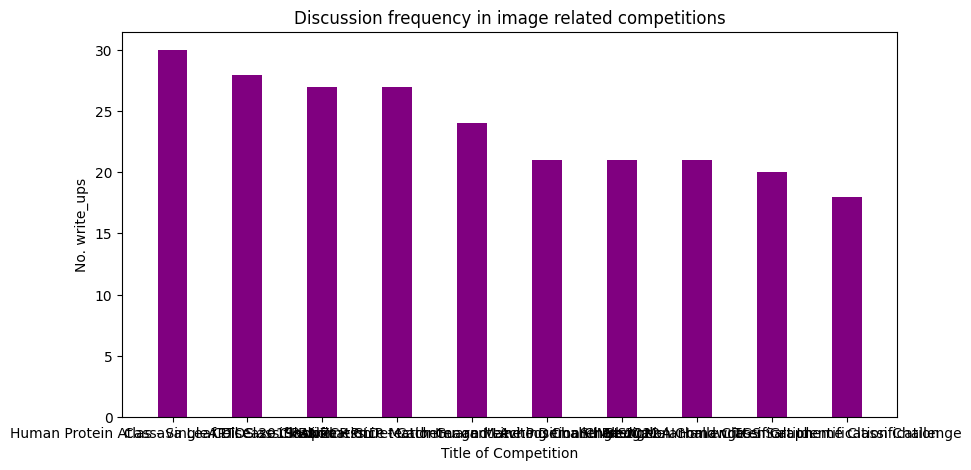

In [121]:
courses = df2['title_of_competition']
values = df2['counts']
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='purple',
        width = 0.4)
 
plt.xlabel("Title of Competition")
plt.ylabel("No. write_ups")
plt.title("Discussion frequency in image related competitions")
plt.show()

What kind of problems are people interested in image/video ares?
*   Generate category distribution based on tile and description. 
*   Tag the title of competitions



Text Analysis and Visualization based on Understanding Clouds from Satellite Images

In [125]:
riid = df[(df['title_of_competition']=="Human Protein Atlas - Single Cell Classification")].reset_index(drop=True)
nRow, nCol = riid.shape
print(f'There are {nRow} rows and {nCol} columns')
riid.tail()

There are 30 rows and 7 columns


,competition_launch_date,title_of_competition,competition_url,date_of_writeup,title_of_writeup,writeup,writeup_url
25,01/26/2021 23:56:29,Human Protein Atlas - Single Cell Classification,https://www.kaggle.com/c/23823,05/12/2021 04:27:21,18th place solution private 0.515 public 0.514,<p>Thanks to kaggle and the organizers for put...,https://www.kaggle.com/c/23823/discussion/238385
26,01/26/2021 23:56:29,Human Protein Atlas - Single Cell Classification,https://www.kaggle.com/c/23823,05/25/2021 12:30:09,32nd Place Solution,<p>I had a great experience in the last months...,https://www.kaggle.com/c/23823/discussion/241637
27,01/26/2021 23:56:29,Human Protein Atlas - Single Cell Classification,https://www.kaggle.com/c/23823,05/17/2021 21:40:38,HPA 36th Place Solution,<p>First of all we would like to thank the hos...,https://www.kaggle.com/c/23823/discussion/239861
28,01/26/2021 23:56:29,Human Protein Atlas - Single Cell Classification,https://www.kaggle.com/c/23823,05/12/2021 03:17:01,46th place solution - Simple Image Level Multi...,<p>Congrats to all winners! Thanks to the orga...,https://www.kaggle.com/c/23823/discussion/238373
29,01/26/2021 23:56:29,Human Protein Atlas - Single Cell Classification,https://www.kaggle.com/c/23823,05/24/2021 08:03:16,28th solution/ with self-supervised learning,<p>Thanks to the organizers for this very inte...,https://www.kaggle.com/c/23823/discussion/241355


In [126]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [127]:
text = " ".join(titl for titl in riid.title_of_writeup)

stopwords = set(STOPWORDS)
stop_list = ['solution', 'place']
stopwords = list(STOPWORDS) + stop_list

print(text)


Private 22nd Place Solution Fair Cell Activation Network and Swin Transformer, the 1st place solution 8th place solution 31rd Place Solution: CAM only. 10th Place Solution HPA 2nd Place Solution [red.ai] 6th place Solution Summary(0.549) 💥💥Human Protein Atlas - Solution Compilation 💥💥 9th Place Solution 23rd Place Solution: You don't need heuristics or expensive GPU 7th place solution 11st Place Solution Summary: Active learning for cell label mining and Ensemble of different models 41st Place Solution: Cell-based RoI Pooling + Transformer Encoder 16th Place Solution: CNN, Yolov5, and use image-wise model to predict the cell 5th place solution - my part 12th place solution summary (0.530 LB) 15th Place Solution: CAM & Semantic Segmentation approach 4th Place Solution: MILIMED 27th place solution (0.483LB) 21st Place Solution: You don't need cell tiles Private 0.458 with 3 single cell classifiers (37th place solution) - a data centric approach 24th place (private) solution - Single mode

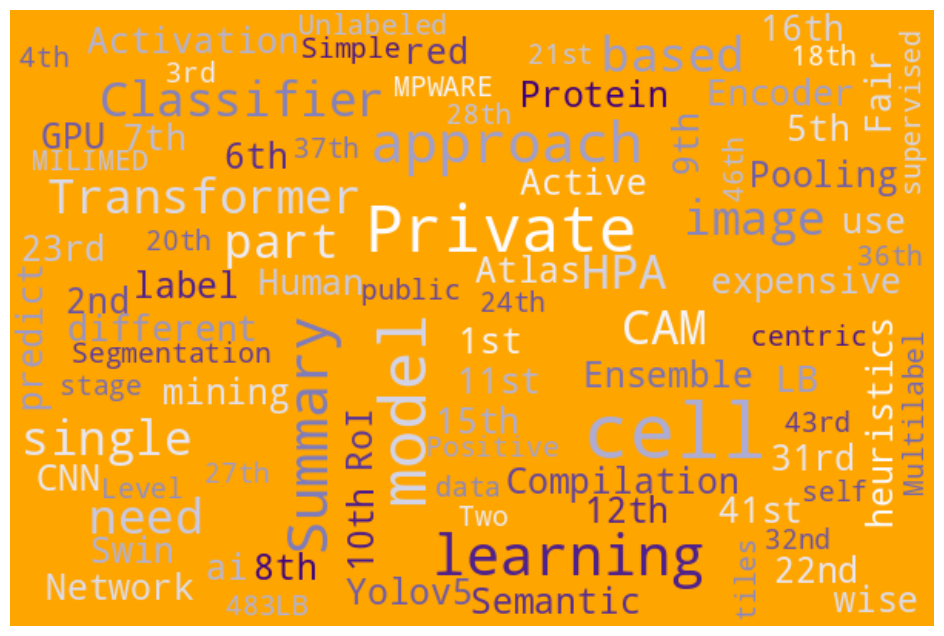

In [128]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      colormap='Purples',
                      background_color="orange").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [129]:
# Analysis based on the discussion content
image_text = " ".join(titl for titl in riid.writeup)

# remove html tags
import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

image_text = cleanhtml(image_text)

In [130]:
import nltk
from nltk.tokenize import word_tokenize

In [44]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

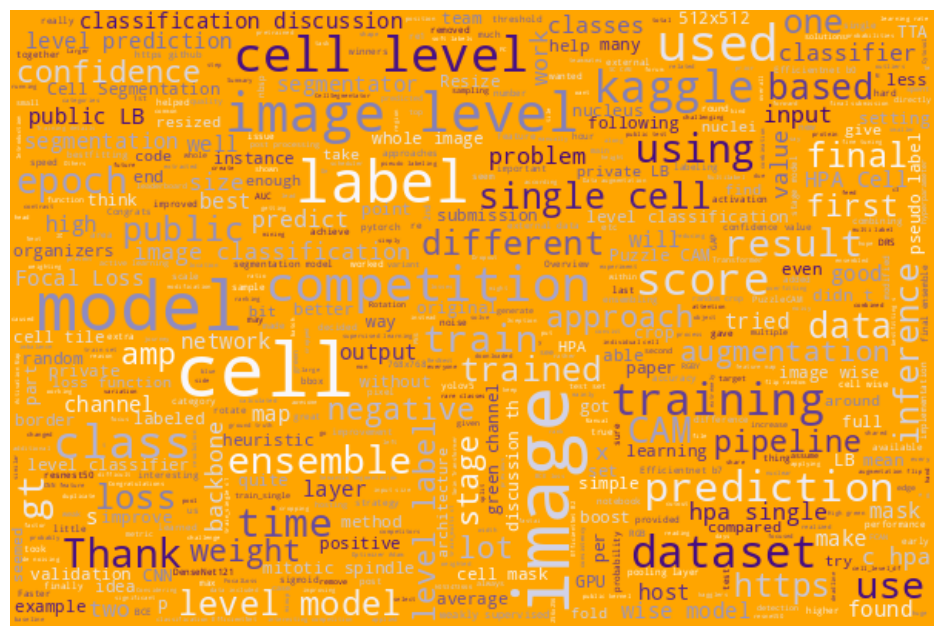

In [131]:
# write up visualization
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      colormap='Purples',
                      background_color="orange").generate(image_text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Coudn't see any meaningful result from the visualization board.